### LSTM을 이용한 텍스트 생성
 - 데이터 다운로드 : 캐글 New Yourk TImes Comments
 - ArticlesApril2018.csv

In [1]:
import pandas as pd
from google.colab import files
up = files.upload()

Saving ArticlesApril2018.csv to ArticlesApril2018.csv


In [2]:
df = pd.read_csv('ArticlesApril2018.csv', encoding='latin1')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleadersâ Settlement Offer...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"âI understand that they could meet with us, ...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,Whatâs it like to eat at the second incarnat...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Torontoâs ...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


- 데이터 전처리 : headline column만 사용

In [3]:
df.headline.isnull().sum()

0

In [4]:
headline = df.headline.values.tolist()
headline[:5]

['Former N.F.L. Cheerleadersâ\x80\x99 Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [5]:
len(headline)

1324

In [6]:
# 노이즈 데이터('Unknown')제거
headlines = [line for line in df.headline.values if line != 'Unknown']
len(headlines)

1214

In [7]:
# encoding, 구둣점 제거, 소문자로 변환
import re
def preprocessing(s):
    s = s.encode('utf8').decode('ascii', 'ignore')
    s = re.sub('[^A-Za-z0-9 ]', '', s)
    return s.lower()

In [8]:
headlines = [preprocessing(line) for line in headlines]
headlines[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

### Keras 텍스트 전처리

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [10]:
# 단어 집합 생성
t = Tokenizer()
t.fit_on_texts(headlines)


In [11]:
# 단어 집학 크기 - Keras Tokenizer의 시작 인덱스가 1이기 때문에 1을 추가해줘야 함
vocab_size = len(t.word_index) + 1
vocab_size

3494

In [12]:
# sequence 생성
sequences = []
for line in headlines:
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequences.append(encoded[:i+1])
sequences[:15]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3],
 [100, 3, 1117],
 [100, 3, 1117, 2],
 [100, 3, 1117, 2, 14],
 [100, 3, 1117, 2, 14, 583]]

In [13]:
max_len = max(len(seq) for seq in sequences)
max_len

24

In [14]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [15]:
sequences[:3]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          99,  269],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   99,
         269,  371],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   99,  269,
         371, 1115]], dtype=int32)

In [16]:
X = sequences[:, :-1]
y = sequences[:, -1]
Y = to_categorical(y) 
X.shape, Y.shape

((7803, 23), (7803, 3494))

### 모델 정의/설정/학습
 - Embedding vector 갯수 : 10
 - LSTM unit 갯수 : 128

In [17]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM

In [19]:
model = Sequential([
    Embedding(vocab_size, 10, input_length = max_len - 1),
    LSTM(128),
    Dense(vocab_size, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 10)            34940     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense (Dense)               (None, 3494)              450726    
                                                                 
Total params: 556,834
Trainable params: 556,834
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [22]:
%time hist1 = model.fit(X, Y, epochs=100, verbose = 1)

Epoch 1/100
244/244 [==============================] - 2s 9ms/step - loss: 7.6285 - accuracy: 0.0291
Epoch 2/100
244/244 [==============================] - 2s 9ms/step - loss: 7.1180 - accuracy: 0.0269
Epoch 3/100
244/244 [==============================] - 2s 8ms/step - loss: 6.9823 - accuracy: 0.0340
Epoch 4/100
244/244 [==============================] - 2s 9ms/step - loss: 6.8521 - accuracy: 0.0406
Epoch 5/100
244/244 [==============================] - 2s 9ms/step - loss: 6.7001 - accuracy: 0.0414
Epoch 6/100
244/244 [==============================] - 2s 9ms/step - loss: 6.5270 - accuracy: 0.0484
Epoch 7/100
244/244 [==============================] - 2s 8ms/step - loss: 6.3327 - accuracy: 0.0509
Epoch 8/100
244/244 [==============================] - 2s 9ms/step - loss: 6.1307 - accuracy: 0.0588
Epoch 9/100
244/244 [==============================] - 2s 9ms/step - loss: 5.9378 - accuracy: 0.0637
Epoch 10/100
244/244 [==============================] - 2s 9ms/step - loss: 5.7560 - accura

In [24]:
hist1.history['accuracy'][-1]

0.8747917413711548

- 모델 검증

In [25]:
up = files.upload()

Saving my_util.py to my_util.py


In [46]:
from my_util import sentence_generation
print(sentence_generation(model, t, max_len, 'coffee', 5))
print(sentence_generation(model, t, max_len, 'epa', 8))
print(sentence_generation(model, t, max_len, 'default', 10))

coffee going to die just face
epa to unveil a new rule its effect less
default comebacks trump start a farm crisis to seized files could


In [45]:
print(sentence_generation(model, t, max_len, 'coffee', 3))
print(sentence_generation(model, t, max_len, 'epa', 2))
print(sentence_generation(model, t, max_len, 'default', 1))

coffee going to die
epa to unveil
default comebacks


- 훈련과정 시각화

In [36]:
y_acc = hist1.history['accuracy']
y_loss = hist1.history['loss']
xs = np.arange(1, len(y_acc) + 1)

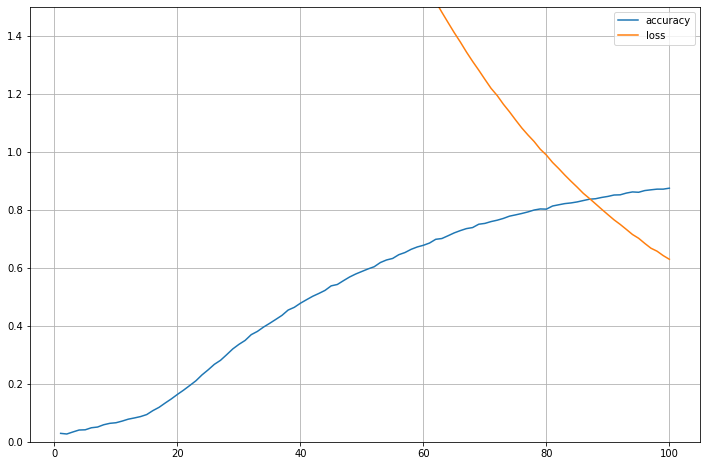

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='accuracy')
plt.plot(xs, y_loss, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()

### SimpleRNN으로 했을때

In [47]:
from tensorflow.keras.layers import SimpleRNN, GRU

In [49]:
model2 = Sequential([
    Embedding(vocab_size, 10, input_length = max_len - 1),
    SimpleRNN(128),
    Dense(vocab_size, activation='softmax')
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 23, 10)            34940     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               17792     
                                                                 
 dense_2 (Dense)             (None, 3494)              450726    
                                                                 
Total params: 503,458
Trainable params: 503,458
Non-trainable params: 0
_________________________________________________________________


In [51]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])
%time hist1 = model2.fit(X, Y, epochs=100, verbose = 0)

CPU times: user 15min 18s, sys: 1min 46s, total: 17min 5s
Wall time: 10min 1s


In [52]:
hist1.history['accuracy'][-1]

0.9163142442703247

In [54]:
y_acc2 = hist1.history['accuracy']
y_loss2 = hist1.history['loss']
xs2 = np.arange(1, len(y_acc) + 1)

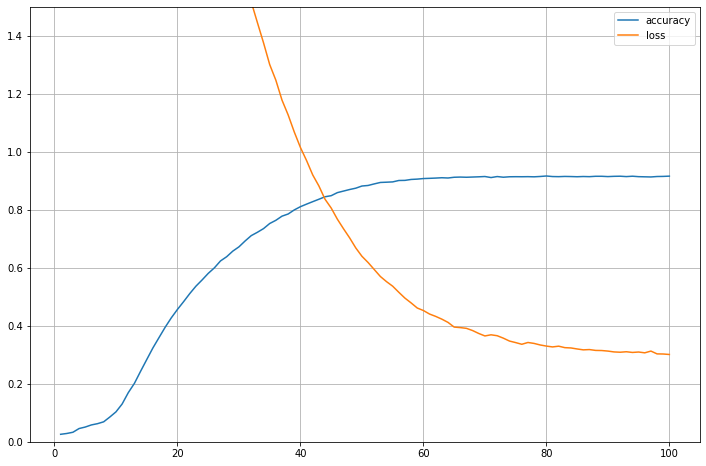

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(xs2, y_acc2, label='accuracy')
plt.plot(xs2, y_loss2, label='loss')
plt.legend(), plt.grid()
plt.ylim([0, 1.5])
plt.show()